# Data distributions

### Training

In [53]:
from data import dataset
import numpy as np
from scipy.sparse import coo_matrix, csc_matrix, csr_matrix
import matplotlib.pyplot as plt

um_train = dataset.load_sparse_matrix(file="../data/raw_ratings_train.npz")

print("shape", um_train.shape)
print("max=", np.max(um_train))
print("average=", np.mean(um_train))
print("min=", np.min(um_train))

shape (610, 9724)
max= 5.0
average= 0.04763067212440407
min= 0.0


### Valiation

In [54]:
um_valid = dataset.load_sparse_matrix(file="../data/raw_ratings_valid.npz")

print("shape", um_valid.shape)
print("max=", np.max(um_valid))
print("average=", np.mean(um_valid))
print("min=", np.min(um_valid))

shape (610, 9724)
max= 5.0
average= 0.01189468679825478
min= 0.0


## Rating distriubution (over clicks)

### Training

(array([ 1099.,  2252.,  1439.,  6014.,  4442., 16070., 10449., 21421.,
         6891., 10592.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <a list of 10 Patch objects>)

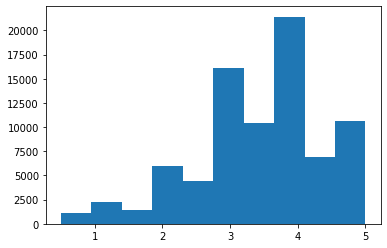

In [55]:
plt.hist(x=um_train.data, bins=10)

### Validation

(array([ 271.,  559.,  352., 1537., 1108., 3977., 2687., 5397., 1660.,
        2619.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <a list of 10 Patch objects>)

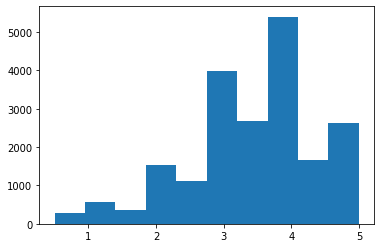

In [56]:
plt.hist(x=um_valid.data, bins=10)

## Percentage rated (over clicks)

### Training

In [57]:
np.sum(um_train != 0)/(um_train.shape[0]*um_train.shape[1])

0.013599780161978811

### Validation

In [58]:
np.sum(um_valid != 0)/(um_valid.shape[0]*um_valid.shape[1])

0.0033999028936348126

## How many movies are rated per user?

### Training

min= 12
max= 2170
average= 132.24426229508197


(array([521.,  54.,  15.,  11.,   5.,   0.,   1.,   1.,   0.,   2.]),
 array([  12. ,  227.8,  443.6,  659.4,  875.2, 1091. , 1306.8, 1522.6,
        1738.4, 1954.2, 2170. ]),
 <a list of 10 Patch objects>)

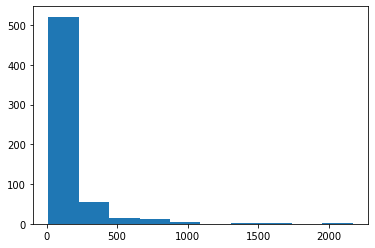

In [59]:
num_ratings_per_user = np.sum(um_train.tocsr() != 0, axis=1)
num_ratings_per_user = np.squeeze(np.asarray(num_ratings_per_user))

print("min=", np.min(num_ratings_per_user))
print("max=", np.max(num_ratings_per_user))
print("average=", np.mean(num_ratings_per_user))
plt.hist(x=num_ratings_per_user, bins=10)

### Validation

min= 1
max= 528
average= 33.06065573770492


(array([507.,  65.,  18.,   9.,   5.,   2.,   1.,   1.,   0.,   2.]),
 array([  1. ,  53.7, 106.4, 159.1, 211.8, 264.5, 317.2, 369.9, 422.6,
        475.3, 528. ]),
 <a list of 10 Patch objects>)

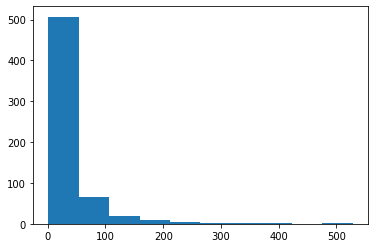

In [60]:
num_ratings_per_user = np.sum(um_valid.tocsr() != 0, axis=1)
num_ratings_per_user = np.squeeze(np.asarray(num_ratings_per_user))

print("min=", np.min(num_ratings_per_user))
print("max=", np.max(num_ratings_per_user))
print("average=", np.mean(num_ratings_per_user))
plt.hist(x=num_ratings_per_user, bins=10)

## How many ratings each movie received?

### Training

min= 0
max= 256
average= 8.295865898807076


(array([8.901e+03, 5.310e+02, 1.430e+02, 7.700e+01, 3.300e+01, 1.600e+01,
        1.500e+01, 2.000e+00, 3.000e+00, 3.000e+00]),
 array([  0. ,  25.6,  51.2,  76.8, 102.4, 128. , 153.6, 179.2, 204.8,
        230.4, 256. ]),
 <a list of 10 Patch objects>)

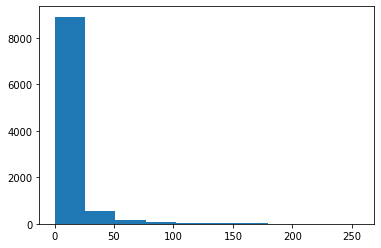

In [61]:
um_csc = um_train.tocsc()
num_ratings_per_movie = np.sum(um_csc != 0, axis=0)
num_ratings_per_movie = np.squeeze(np.asarray(num_ratings_per_movie))

print("min=", np.min(num_ratings_per_movie))
print("max=", np.max(num_ratings_per_movie))
print("average=", np.mean(num_ratings_per_movie))
plt.hist(x=num_ratings_per_movie, bins=10)

#### Proportion of movies that are not at all rated

In [62]:
print("p=", np.sum(num_ratings_per_movie == 0)/num_ratings_per_movie.shape[0])

p= 0.07640888523241464


### Validation

min= 0
max= 73
average= 2.0739407651172357


(array([9.022e+03, 4.480e+02, 1.340e+02, 6.500e+01, 2.800e+01, 1.600e+01,
        4.000e+00, 4.000e+00, 2.000e+00, 1.000e+00]),
 array([ 0. ,  7.3, 14.6, 21.9, 29.2, 36.5, 43.8, 51.1, 58.4, 65.7, 73. ]),
 <a list of 10 Patch objects>)

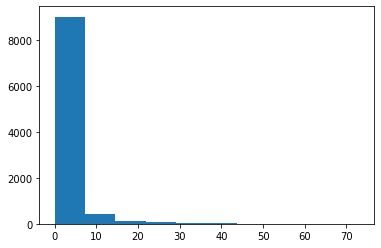

In [63]:
um_csc = um_valid.tocsc()
num_ratings_per_movie = np.sum(um_csc != 0, axis=0)
num_ratings_per_movie = np.squeeze(np.asarray(num_ratings_per_movie))

print("min=", np.min(num_ratings_per_movie))
print("max=", np.max(num_ratings_per_movie))
print("average=", np.mean(num_ratings_per_movie))
plt.hist(x=num_ratings_per_movie, bins=10)

#### Proportion of movies that are not at all rated

In [64]:
print("p=", np.sum(num_ratings_per_movie == 0)/num_ratings_per_movie.shape[0])

p= 0.4721308103661045
